# A quick overview of mpld3

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mpld3

In [2]:
# So we can render plots in latex
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

Let's generate a basic power law dataset with a few outliers.

In [3]:
params = [2.03e7, -2.38]
x = np.concatenate([np.linspace(1.0, 100.0, 5000),
                    np.linspace(100.0, 283.0, 1000)])
labels = np.random.randint(1e5, 1e7, len(x)).astype(str)
y = params[0] * x ** params[1]
# Fraction of stars to be outliers
true_frac = 0.999

Add a bit of scatter

In [4]:
y += (y/2.0) * np.random.randn(len(x))

Create outliers

In [5]:
outliers = np.random.rand(len(x)) > true_frac
y[outliers] += (2.0*y[outliers]) * np.random.randn(len(y[outliers]))

Remove any y-values less than zero!

In [6]:
sel = np.where(y > 0)
x, y, labels = x[sel], y[sel], labels[sel].tolist()
labels = ['KIC '+str(i) for i in labels]

Plot the initial data

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


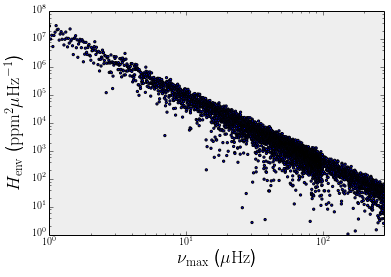

In [7]:
fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
ax.scatter(x, y, marker='.')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1, 283.0)
ax.set_ylim(1, 1e8)
ax.set_xlabel(r'$\nu_{\mathrm{max}}$ ($\mu\mathrm{Hz}$)', fontsize=18)
ax.set_ylabel(r'$H_{\mathrm{env}}$ ($\mathrm{ppm}^{2}\mu\mathrm{Hz}^{-1}$)', fontsize=18)

Now we have a few "outliers", but how do we identify them?

In [8]:
# Enable use of mpld3 in notebook
mpld3.enable_notebook()
fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
scatter = ax.scatter(np.log10(x), np.log10(y), marker='.')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlim(np.log10(1), np.log10(283.0))
ax.set_ylim(-1, 8)
ax.set_xlabel(r'log10(numax)', fontsize=18)
ax.set_ylabel(r'log10(Henv)', fontsize=18)
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)
mpld3.display(fig)